# 📝 Exercise M5.02

The aim of this exercise is to find out whether a decision tree
model is able to extrapolate.

By extrapolation, we refer to values predicted by a model outside of the
range of feature values seen during the training.

We will first load the regression data.

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")

data_columns = ["Flipper Length (mm)"]
target_column = "Body Mass (g)"

data_train, target_train = penguins[data_columns], penguins[target_column]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

First, create two models, a linear regression model and a decision tree
regression model, and fit them on the training data. Limit the depth at
3 levels for the decision tree.

In [3]:
# Write your code here.
#linear regression model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(data_train, target_train)

LinearRegression()

In [4]:
#tree regression model
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)

DecisionTreeRegressor(max_depth=3)

Create a testing dataset, ranging from the minimum to the maximum of the
flipper length of the training dataset. Get the predictions of each model
using this test dataset.

In [6]:
# Write your code here.
import numpy as np

data_test = pd.DataFrame(np.arange(data_train[data_columns[0]].min(),
                                   data_train[data_columns[0]].max()),
                         columns=data_columns)

In [7]:
linear_predicted = linear_model.predict(data_test)

tree_predicted = tree.predict(data_test)

Create a scatter plot containing the training samples and superimpose the
predictions of both model on the top.

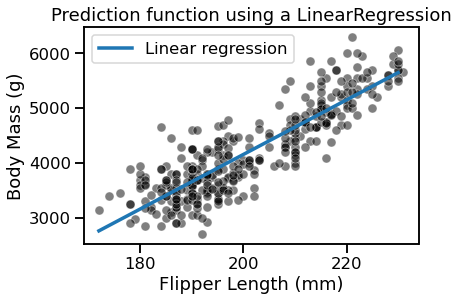

In [12]:
# Write your code here.
#Plot for linear predictions
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, linear_predicted, label="Linear regression")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

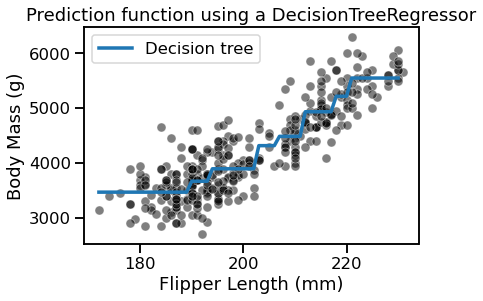

In [13]:
#plot for Tree predictions
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, tree_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

Now, we will check the extrapolation capabilities of each model. Create a
dataset containing the value of your previous dataset. Besides, add values
below and above the minimum and the maximum of the flipper length seen
during training.

In [15]:
# Write your code here.
offset = 30
data_test = pd.DataFrame(np.arange(data_train[data_columns[0]].min() - offset,
                                   data_train[data_columns[0]].max() + offset),
                         columns=data_columns) 

Finally, make predictions with both model on this new testing set. Repeat
the plotting of the previous exercise.

In [18]:
# Write your code here.
target_predicted_linear_regression = linear_model.predict(data_test)
target_predicted_tree = tree.predict(data_test)

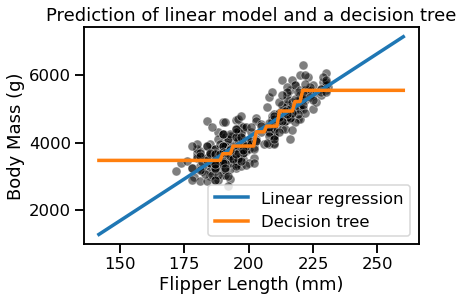

In [19]:
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, target_predicted_linear_regression,
         label="Linear regression")
plt.plot(data_test, target_predicted_tree, label="Decision tree")
plt.legend()
_ = plt.title("Prediction of linear model and a decision tree")